# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.call import call_on_students

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [3]:
call_on_students(1)

['Hera']


#### Answer: 

- dimensionality reduction, features
- used to 'compress data'
- preprocessing
- capture the variance in our features/data
- first principal component explains the most amount of the variance
- uses eigen decompsition (linear algreba) to produce eigenvalues (variance explained) and eigenvectors (component weights)

### 2: What are some reasons to use PCA?

In [5]:
call_on_students(1)

['Anat']


#### Answer: 

- reduce dimensions, features, reduce complexity (play into reducing overfitting)
- this might result in faster training for supervised learning
- principal components are orthogonal to eachother (right angles) --> eliminate all multicolinearity
- can help visual structure of large datasets based on the first few components
- CON: lose a bit on interpretability

### 3: Why is scaling important for PCA?

In [4]:
call_on_students(1)

['JD']


#### Answer: 

- puts all of our features/data in the same units, scale, range
- we want to not weight features with small or large scales differently
- distanced based!! linear process
- PCA is based on distance within variance, meaning large variance sizes will be disproporionately favored by PCA unless they are standard scaled


### 4: How can one determine how many principle components to use in a model?

In [6]:
call_on_students(1)

['Keanan']


#### Answer: 

- Can set n_components based on proportion of variance you want explained (ie. .95, our PCs explain at least 95% of the variance in data)
- Could also hard set based on integer value
- For visualization only need 2 or 3
- We could look at the explained variance (cumsum() maybe) and find where we start having diminshing returns


## PCA in Code

### Set Up

In [7]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- dropping nulls
- scaling data!


In [8]:
call_on_students(1)

['Max']


In [11]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [12]:
X_sc

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [13]:
call_on_students(1)

['Luke']


In [14]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

# Instantiate
pca_transformer = PCA(n_components=.95, random_state=42)

# Fit
#pca_transformer.fit(X_sc)
#pca_data = pca_tranformer.transform(X_sc)
pca_data = pca_transformer.fit_transform(X_sc)
pca_data

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -0.39840723,
        -0.15711836, -0.87740188],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.24098846,
        -0.71190482,  1.10699494],
       [ 5.73389628, -1.0751738 , -0.55174759, ...,  0.09737374,
         0.02406564,  0.4542754 ],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  0.34188704,
         0.39391682,  0.52087738],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.28023861,
        -0.54203454, -0.08929612],
       [-5.4752433 , -0.67063679,  1.49044308, ...,  1.04635352,
         0.37410111, -0.04772557]])

In [131]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8,9
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296


### 7: How Much Variance is Explained by the First 2 Components?

In [15]:
call_on_students(1)

['Charlie']


In [16]:
# Code here to answer the question
pca_transformer.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [17]:
pca_transformer.explained_variance_ratio_[:2]

array([0.44272026, 0.18971182])

In [18]:
pca_transformer.explained_variance_ratio_[0] + pca_transformer.explained_variance_ratio_[1]

0.6324320765155943

In [20]:
sum(pca_transformer.explained_variance_ratio_[:2])

0.6324320765155943

In [21]:
pca_transformer.explained_variance_ratio_[:2].cumsum()

array([0.44272026, 0.63243208])

#### Answer:

- ~63%


In [22]:
# eigenvalues
pca_transformer.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

In [30]:
# eigenvectors
pca_transformer.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [31]:
call_on_students(1)

['Kevin']


#### Answer:

- Set initial number of cluster centers (centroids) based on K number (n_clusters). Randomly assign to data points
- Calculate distance from each centroid to every data point
- Assign data points to their closest centroid
- Adjust the centroid based on the mean of all the data points assigned to it
- Remeasure distances, and reassign points to closet as needed
- Repeat this process skipping step one, until centroids no longer move or we hit a set tolerance
- Try again with new starting centroids
- Algorithm will pick the result that minimizes intra-cluster (within clusters) distance and maximizes our inter-cluster (b/t clusters) distance

### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [32]:
call_on_students(1)

['Alvaro']


#### Answer:

- Elbow method or elbow plot
- Uses Sum of Squared Errors, SSE, (inertia) to find best value of k
- Intertia can be thought of as a measure of intra-cluster distance


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [34]:
call_on_students(1)

['Alison']


#### Answer:

- Silhouette coefficient, silhouette score
- Ranges b/t -1 and 1, closer to 1 denotes 'better' clustering
- We want to the highest score
- Looks at a measure of both intra and inter cluster distance


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [35]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

In [36]:
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- clustering is distance based
- null values
- scale!!!


In [38]:
call_on_students(1)

['Stephanie']


In [39]:
# Code to preprocess the data
# Name the processed data X_processed
clus_scaler = StandardScaler()

X_processed = clus_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [ ]:
# call_on_students(1)

In [40]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [41]:
# Instantiate
hac = AgglomerativeClustering(n_clusters=2)
# Fit the object
hac.fit(X_processed)

AgglomerativeClustering()

In [42]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score

In [46]:
labels1 = hac.fit_predict(X_processed)
labels1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
labels2 = hac.labels_
labels2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
labels1 == labels2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [48]:
silhouette_score(X_processed, labels1)

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [49]:
call_on_students(1)

['Vlad']


In [50]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    # Instantiate
    hac = AgglomerativeClustering(n_clusters=n)
    
    # Fit the new clustering model
    hac.fit(data)
    
    labels = hac.labels_
    # Print the silhouette score
    print(silhouette_score(data, labels))
    
    # Return the labels attribute from the fit clustering model
    return labels

In [51]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475989
0.446689041028591
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.316969830299128
0.310946529007258


# 3) Time Series

In [61]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- create datetime object for our date column ('Month')
- set datetime as index


In [54]:
call_on_students(1)

['Vlad']


In [55]:
# Code here 
ap.set_index(pd.to_datetime(ap['Month']), inplace=True)
ap.head()

,Month,#Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [56]:
ap_ts = ap['#Passengers']
ap_ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [59]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [60]:
# Another way
ap_ts2 = pd.Series(data=ap['#Passengers'].values,
                   index=pd.to_datetime(ap['Month']))
ap_ts2

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Length: 144, dtype: int64

In [62]:
# Third way
ap_ts3 = ap['#Passengers']
ap_ts3.index = pd.to_datetime(ap['Month'])
ap_ts3

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

### 15: Explore Patterns in the Data

In [63]:
call_on_students(1)

['Alison']


First: what kinds of patterns can one find in time series data?

- Seasonality / Periodicity
- Cyclic (unpredicable periods)
- Trends (upward or downward movement of the mean)
    - Could be linear or exponential, negative or postive
- Irregularity (random flucuations in variance)
    - Capturing homoscedasticity/heteroscedasticity


Second, plot this time series data. What kinds of patterns do you see in this dataset?

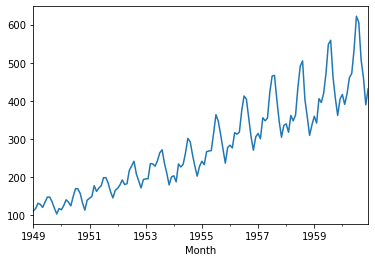

In [69]:
# Code to plot the time series
ap_ts3.plot();


In [72]:
ap_ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

Linear positive trend and annual seasonality

Also some heterness going on in variance

### 16: Explore the Moving Average

What window would make sense to use for this data?

- window = 12 = yearly moving average


In [71]:
call_on_students(1)

['Alvaro']


In [76]:
# Code to create the moving average
moving_avg_yearly = ap_ts.rolling(window=12).mean()

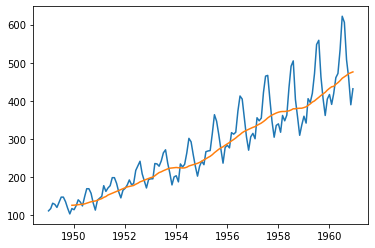

In [77]:
# Add to the moving average to the above plot
plt.plot(ap_ts)
plt.plot(moving_avg_yearly);

### 17: Explore Stationarity


In [79]:
call_on_students(1)

['JD']


Why do we try to make our data stationary?

- so that values are not dependant on time (date)
- the mean, variance, and covariance of the time series do not change over time


What can we do to make our data stationary?

- Difference: subract previous value from the current one
    - Second order difference: difference the 1st order differences
- Transformation: log or maybe sqrt
- Subract rolling average from our data


### 18: Check Stationarity

In [80]:
call_on_students(1)

['Kevin']


In [81]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller

In [83]:
adfuller(ap_ts)[1]

0.9918802434376409

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [84]:
call_on_students(1)

['Keanan']


In [97]:
# Code here to try to make the data stationary
diff_ts = ap_ts.diff().dropna()
diff_ts

Month
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: #Passengers, Length: 143, dtype: float64

In [100]:
log_ts = np.log(ap_ts)
log_ts

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

In [102]:
log_diff_ts = log_ts.diff().dropna()
log_diff_ts

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Name: #Passengers, Length: 143, dtype: float64

In [106]:
sqrt_ts = np.sqrt(ap_ts)
sqrt_diff_ts = sqrt_ts.diff().dropna()

In [98]:
# Code here to check if the data is stationary
adfuller(diff_ts)

(-2.8292668241699945,
 0.05421329028382621,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [109]:
adfuller(log_diff_ts)

(-2.7171305983881138,
 0.07112054815086194,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -440.35846985568105)

In [101]:
adfuller(log_ts)

(-1.7170170891069634,
 0.42236677477038986,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -445.3990312497209)

In [107]:
adfuller(sqrt_diff_ts)

(-3.186422291164186,
 0.02078418557126859,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 84.47415786409971)

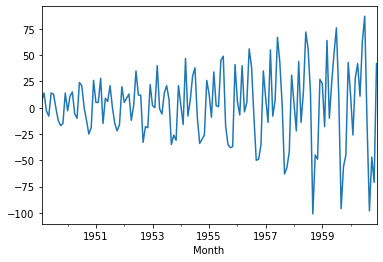

In [99]:
diff_ts.plot();

<AxesSubplot:xlabel='Month'>

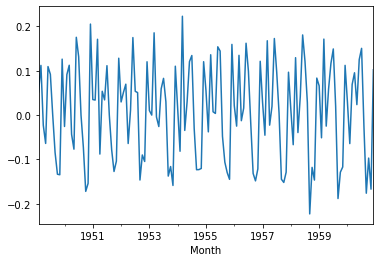

In [104]:
log_diff_ts.plot()

<AxesSubplot:xlabel='Month'>

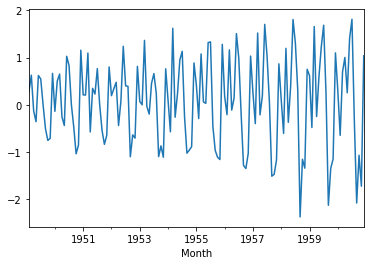

In [108]:
sqrt_diff_ts.plot()

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [110]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [111]:
call_on_students(1)

['Gideon']


#### Answer:

1. tokenize
2. stem or lemmatize
3. lowercase
4. remove punctuation
5. remove stopwords (common words)

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [114]:
call_on_students(1)

['Max']


#### Answer:

- Columns: words (or tokens) from the corpus aka our 'features'
- Rows: each unique document from our corpus is a row
- Counts or Score would be the values

### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [115]:
call_on_students(1)

['Hera']


#### Answer:

- Term Frequency: Inverse Document Frequency
- Uses frequency of tokens within the document (TF) and across our full corpus (IDF) to determine the importance or 'rarity' of the token
- Score of importance for that token to a specific document


## NLP in Code

### Set Up

In [117]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [118]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [119]:
call_on_students(1)

['Stephanie']


In [120]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

X = policies['policy']
y = policies['candidate']
# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [121]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
from nltk.corpus import stopwords

In [123]:
stopwords

<WordListCorpusReader in '/Users/danielburdeno/nltk_data/corpora/stopwords'>

In [124]:
# Instantiate it
cv = CountVectorizer(stop_words=stopwords.words('english'))

# Fit it
cv.fit(X_train)

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

### 24: Vectorize Your Text, Then Model

In [125]:
call_on_students(1)

['Charlie']


In [126]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [128]:
X_train_vec.todense()

matrix([[3, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [6, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [129]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
tff = RandomForestClassifier(random_state=42)
tff.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Code here to evaluate your model on the train and test set
# Train
print(tff.score(X_train_vec, y_train))

# Test
print(tff.score(X_test_vec, y_test))


1.0
0.8958333333333334
